In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\moham\Documents\naresh it\data files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat_column=[i for i,j in dict(visa_df.dtypes).items() if j=='objet']
num_column=[i for i,j in dict(visa_df.dtypes).items() if j!='object']
num_column

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# box plot #

- Box plot is used to identify the outliers
- Outlier is an observation having huge postive value or huge negative value

- Q1 = 25p , Q2=50p and Q3=75p
- IQR = Inter quartile range= Q3-Q1
- Q3+ 1.5* IQR and Q1-1.5*IQR

<function matplotlib.pyplot.show(close=None, block=None)>

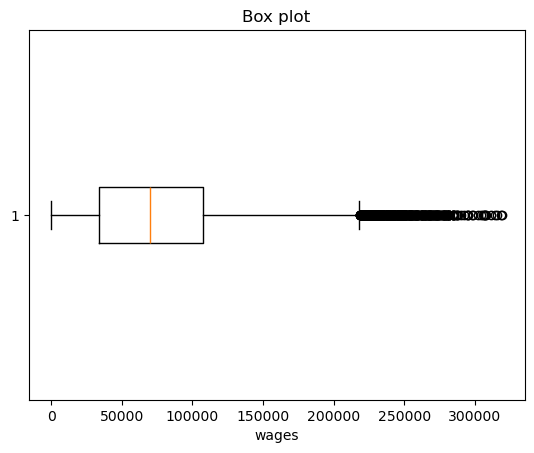

In [8]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Box plot')                        # we only learn how to make boxplot by matplotlib
plt.xlabel('wages')
plt.show

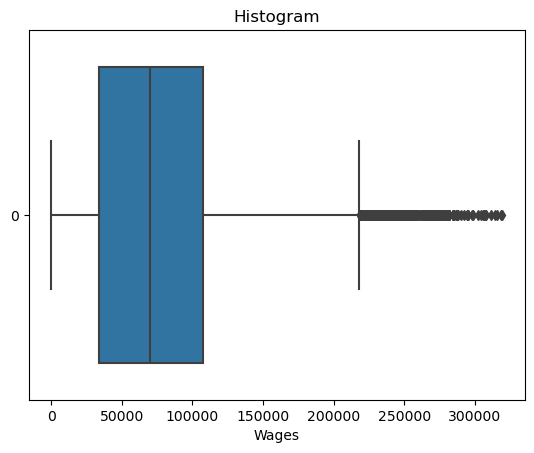

In [13]:
wage_s=visa_df['prevailing_wage']
sns.boxplot(wage_s,orient='h')
plt.title('Histogram')       # we are learning how to make boxplot by seaborn
plt.xlabel('Wages')
plt.show()

# Finding the outliers #
     *We already know that outliers avialble less than Q1-1.5IQR and Q3+1.5IQR*
# Step-1: #
     - Calculate Q1 = 25p
     - calculate Q2= 50p
     - Calculate Q3= 75p
# Step-2: #
     - Calculate IQR= Q3-Q1
# Step-3: #
     - Calculate LB= Q1-1.5*IQR 
     - Calculate UB=Q3+1.5*IQR
# Step-4: #
     - Con1= wage data <LB
     - Con2= wage data >UB
     - Con3= con1 or-and con2 (use bitwise operator)*
# Step-5: #
     - Data [con3]

In [21]:
wage_s=visa_df['prevailing_wage']
q1=np.percentile(wage_s,25)
q2=np.percentile(wage_s,50)
q3=np.percentile(wage_s,75)
IQR=q3-q1
lb=q1-1.5*IQR              # in this format we can see outlier data only in the graphs
ub=q3+1.5*IQR
con1=wage_s<lb                # outlier data mean the data which is up in the graph
con2=wage_s>ub
con3=con1|con2
outlier=visa_df[con3]
outlier

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [23]:
wage_df=visa_df['prevailing_wage']
q1=np.percentile(wage_df,25)
q2=np.percentile(wage_df,50)
q3=np.percentile(wage_df,75)
IQR=q3-q1
lb=q1-1.5*IQR             # in this we can non outlier data in the graph
ub=q3+1.5*IQR
con1=wage_df>lb
con2=wage_df<ub
con3=con1&con2
non_outlier=visa_df[con3]
non_outlier

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


{'whiskers': [<matplotlib.lines.Line2D at 0x1948a713210>,
 'caps': [<matplotlib.lines.Line2D at 0x1948a71ca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1948a712690>],
 'medians': [<matplotlib.lines.Line2D at 0x1948a71df90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1948a71ea50>],
 'means': []}

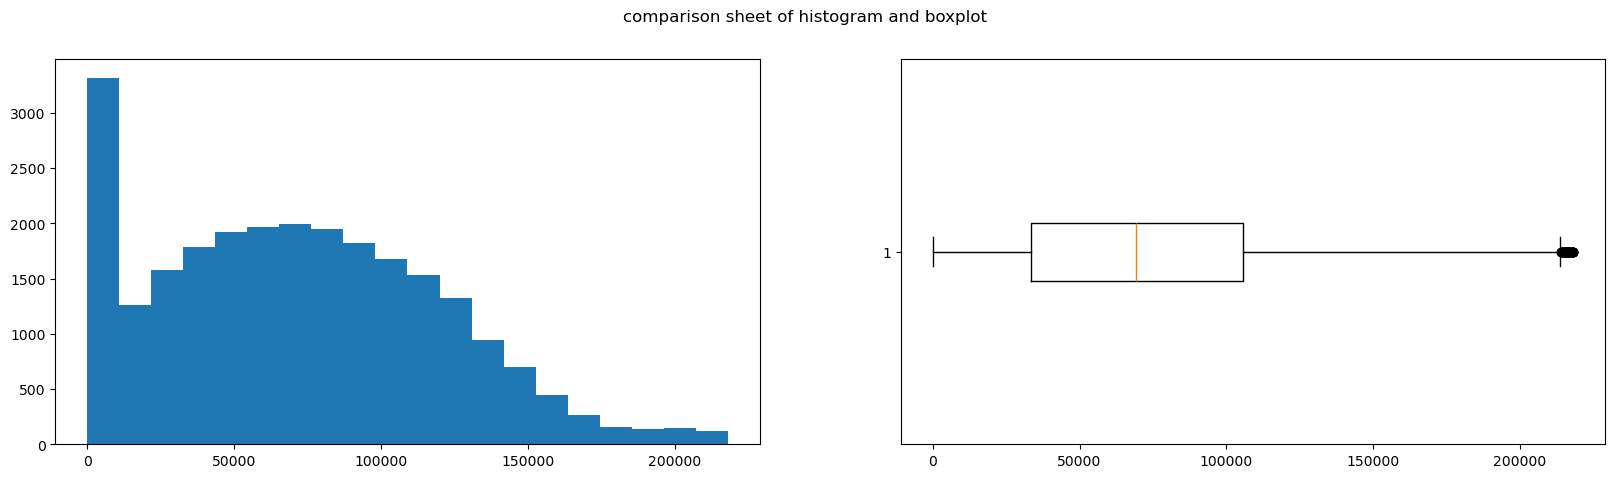

In [38]:
wage_non_outerlier=non_outlier['prevailing_wage']
plt.figure(figsize=(20,5))
plt.suptitle('comparison sheet of histogram and boxplot')
plt.subplot(1,2,1)
plt.hist(wage_non_outerlier,bins=20)
plt.subplot(1,2,2)
plt.boxplot(wage_non_outerlier,vert=False)


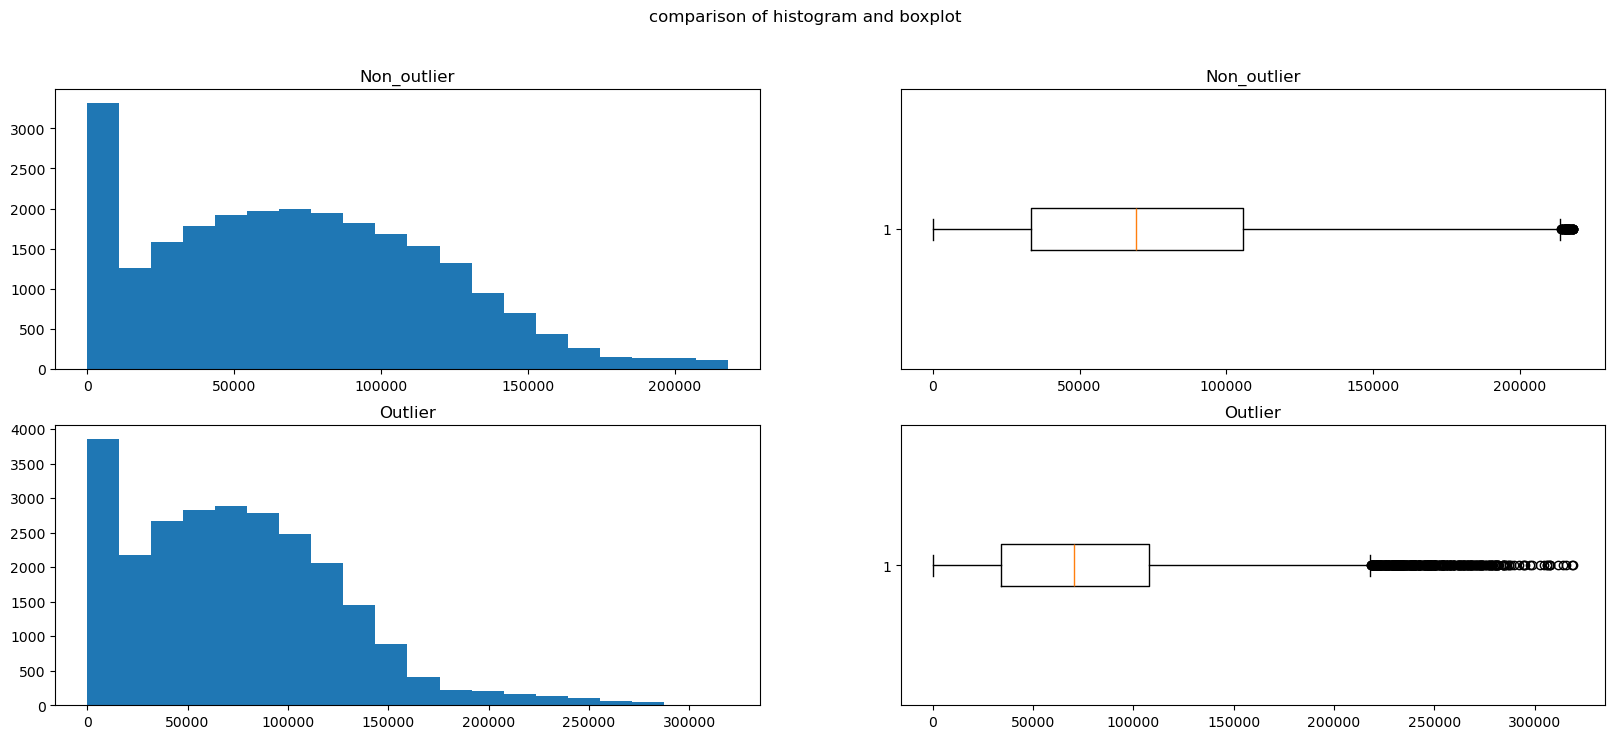

In [45]:
plt.figure(figsize=(20,8))
plt.suptitle('comparison of histogram and boxplot')
plt.subplot(2,2,1)
plt.title('Non_outlier')
plt.hist(non_outlier['prevailing_wage'],bins=20)
plt.subplot(2,2,2)
plt.boxplot(non_outlier['prevailing_wage'],vert=False)
plt.title('Non_outlier')
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=20)
plt.title('Outlier')
plt.subplot(2,2,4)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.title('Outlier')
plt.show()

<Axes: >

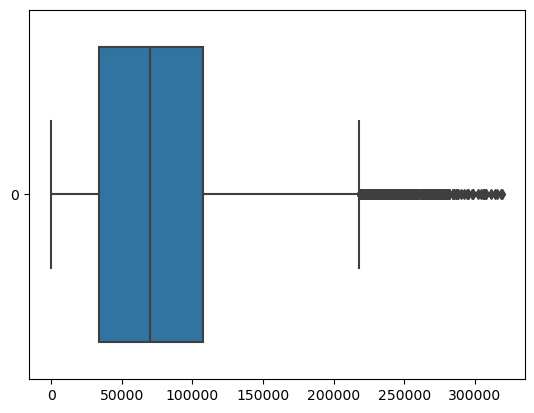

In [49]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

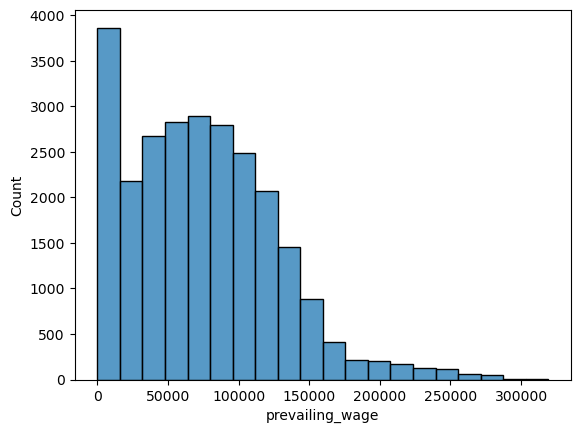

In [51]:
sns.histplot(visa_df['prevailing_wage'],bins=20)

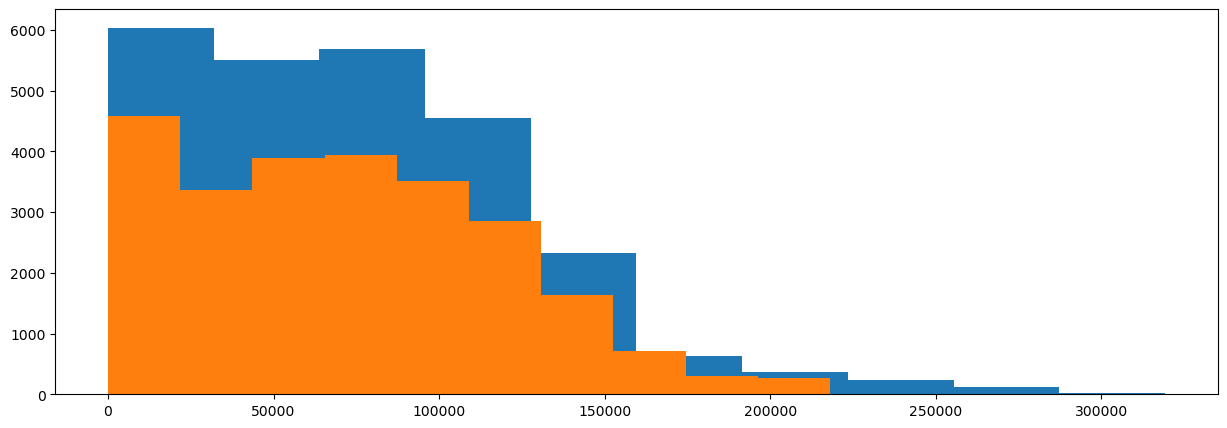

In [53]:
plt.figure(figsize=(15,5))
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outlier['prevailing_wage'])
plt.show()

In [55]:
l=[]